In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-100-youtube-channels-in-2024/YOUTUBE CHANNELS DATASET.csv


In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
df = pd.read_csv("/kaggle/input/top-100-youtube-channels-in-2024/YOUTUBE CHANNELS DATASET.csv")
df.head()

,Ranking,Username,Subscribers,Uploads,Views,Country
0,1.0,MrBeast,336M,838,"66,853,633,536",US
1,2.0,T-Series,281M,"22,313","277,242,795,553",IN
2,3.0,Cocomelon-Nursery Rhymes,186M,1370,"194,361,752,276",US
3,4.0,Youtube Movies,185M,0,0,NaN
4,5.0,Set India,180M,"148,727","172,709,029,653",IN


In [8]:
df.isnull().sum()

Ranking        1
Username       1
Subscribers    1
Uploads        1
Views          1
Country        7
dtype: int64

In [15]:
df = df.dropna()

In [16]:
df = pd.get_dummies(df, columns=['Country'], drop_first=True)

In [17]:
def parse_number(column):
    return pd.to_numeric(df[column].replace({',': '', 'M': 'e6', 'B': 'e9'}, regex=True))

In [18]:
df['Subscribers'] = parse_number('Subscribers')
df['Views'] = parse_number('Views')
df['Uploads'] = parse_number('Uploads')

In [19]:
X = df[['Ranking', 'Uploads', 'Views']]
y = df['Subscribers']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
y_pred = model.predict(X_test)

In [23]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1317030563736842.0
R^2 Score: 0.6728815596211721


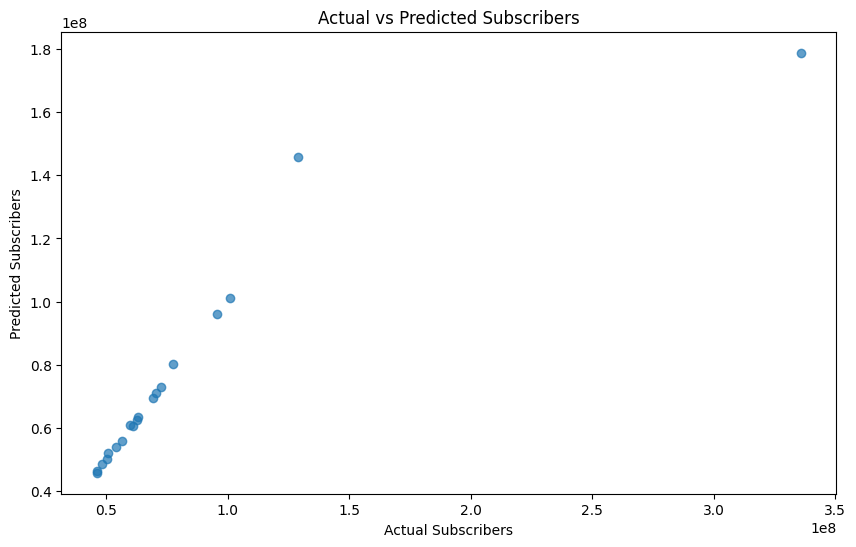

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Subscribers")
plt.ylabel("Predicted Subscribers")
plt.title("Actual vs Predicted Subscribers")
plt.show()


In [25]:
importance = model.feature_importances_
features = X.columns

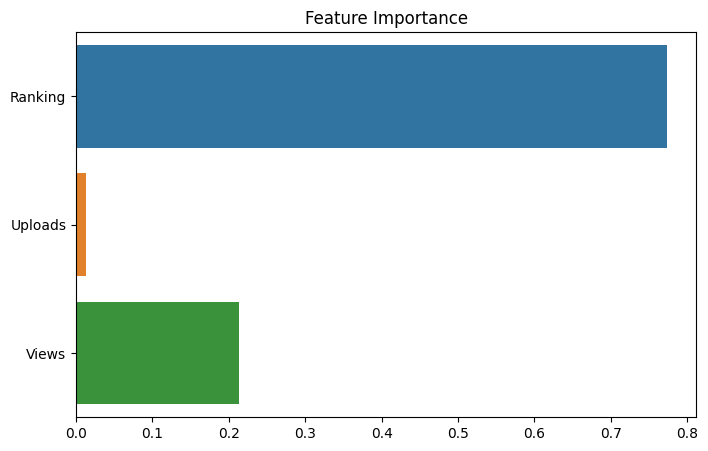

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance")
plt.show()

In [27]:
new_data = pd.DataFrame({
    'Ranking': [13, 14],
    'Uploads': [1000, 500],
    'Views': [1e9, 5e8]
})
predicted_subscribers = model.predict(new_data)
print("Predicted Subscribers for new data:", predicted_subscribers)

Predicted Subscribers for new data: [1.04812e+08 1.01643e+08]
